In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv(r'C:\Users\itlas\Desktop\Machine Learning\Multiple-Linear-Regression\economic_index.csv')

In [3]:
df.head()


,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [10]:
df.drop(columns=["Unnamed: 0", "year", "month"], inplace=True)


In [11]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [13]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [14]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

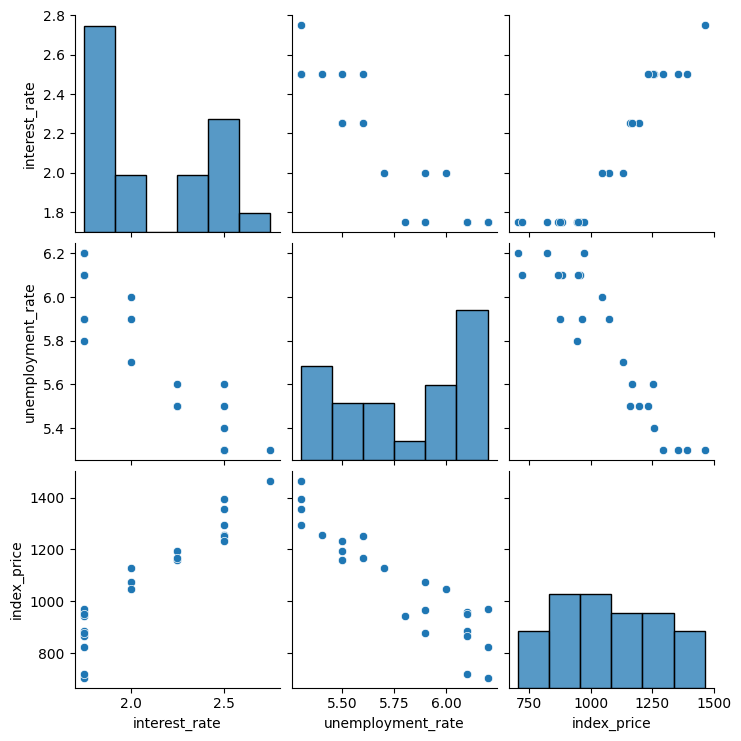

In [15]:
#visualization
import seaborn as sns
sns.pairplot(df)

In [18]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: >

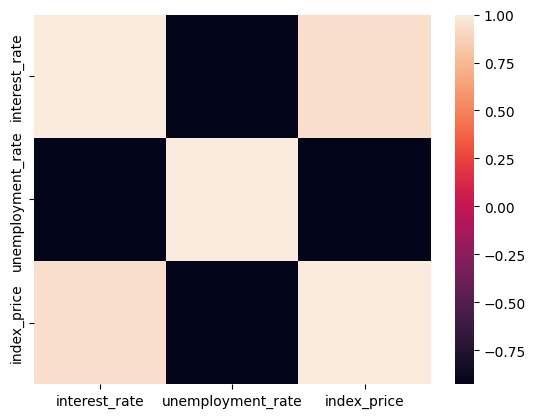

In [19]:
sns.heatmap(df.corr())

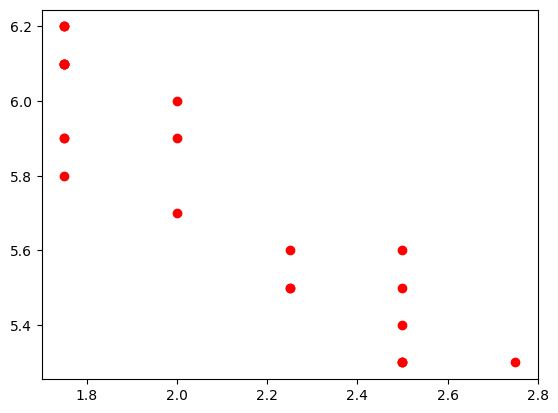

In [20]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')

In [21]:
#dependent and independent 
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [22]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [23]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [ ]:
##train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [26]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

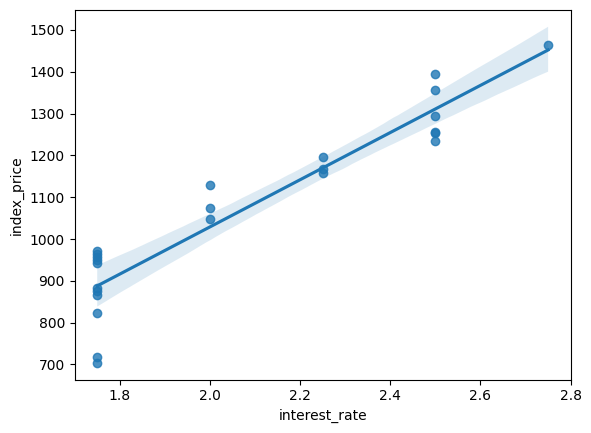

In [28]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])


<Axes: xlabel='index_price', ylabel='unemployment_rate'>

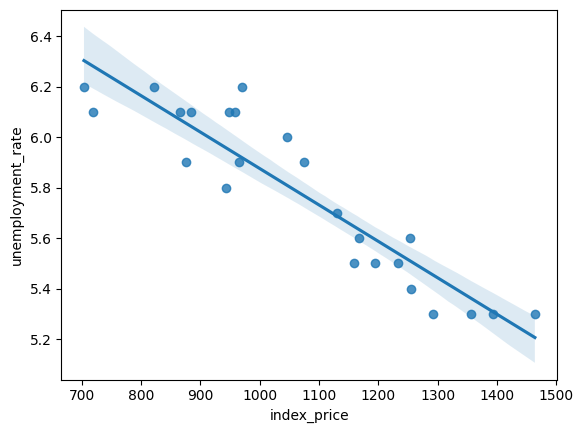

In [30]:
sns.regplot(y=df['unemployment_rate'], x=df['index_price'])


In [31]:
from sklearn.preprocessing import StandardScaler

In [34]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [35]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [36]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [37]:
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
#cross validatioj
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [39]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [40]:
y_pred=regression.predict(x_test)

In [41]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [48]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)


0.7591371539010257


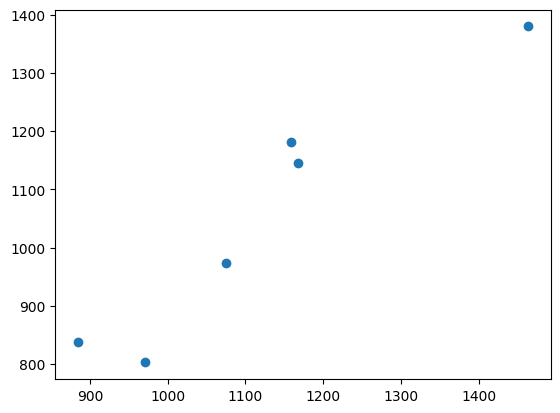

In [49]:
##assumptions
plt.scatter(y_test,y_pred)

In [50]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


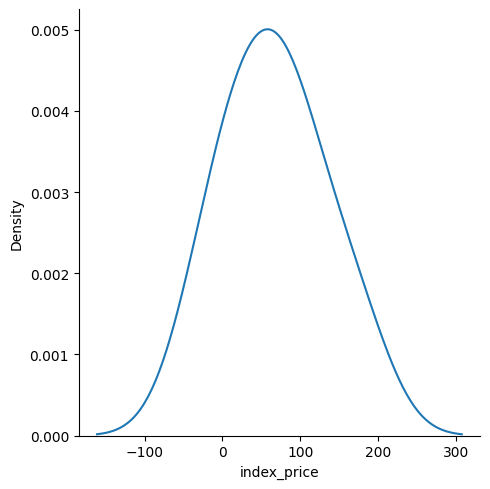

In [51]:
sns.displot(residuals,kind="kde")

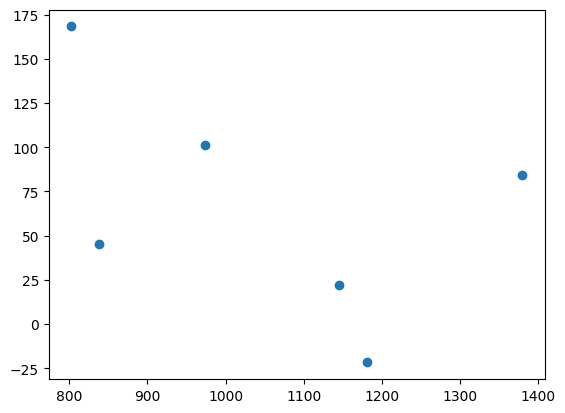

In [52]:
plt.scatter(y_pred,residuals)

In [55]:
#prediction
regression.predict(scalar.transform([[2.75,5.6]]))

C:\Users\itlas\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1272.48497335])